In [123]:
import pandas as pd
import matplotlib.pyplot as plt

In [124]:
#Defining file paths to locate the needful files
customer_info_filepath = 'customer_data.csv'
sales_data_filepath = 'sales_data.csv'

In [125]:
# Load datasets
customer = pd.read_csv(customer_info_filepath)
sales = pd.read_csv(sales_data_filepath)

In [126]:
# Display first few rows of each dataset
customer.head()

,customer_id,gender,age,payment_method
0,C241288,Female,28.0,Credit Card
1,C111565,Male,21.0,Debit Card
2,C266599,Male,20.0,Cash
3,C988172,Female,66.0,Credit Card
4,C189076,Female,53.0,Cash


In [127]:
customer.tail()

,customer_id,gender,age,payment_method
99452,C441542,Female,45.0,Credit Card
99453,C569580,Male,27.0,Cash
99454,C103292,Male,63.0,Debit Card
99455,C800631,Male,56.0,Cash
99456,C273973,Female,36.0,Credit Card


In [128]:
sales.head()

,invoice_no,customer_id,category,quantity,price,invoice_date,shopping_mall
0,I138884,C241288,Clothing,5,1500.40,5/8/2022,Kanyon
1,I317333,C111565,Shoes,3,1800.51,12/12/2021,Forum Istanbul
2,I127801,C266599,Clothing,1,300.08,9/11/2021,Metrocity
3,I173702,C988172,Shoes,5,3000.85,16-05-2021,Metropol AVM
4,I337046,C189076,Books,4,60.60,24-10-2021,Kanyon


In [129]:
sales.tail()

,invoice_no,customer_id,category,quantity,price,invoice_date,shopping_mall
99454,I219422,C441542,Souvenir,5,58.65,21-09-2022,Kanyon
99455,I325143,C569580,Food & Beverage,2,10.46,22-09-2021,Forum Istanbul
99456,I824010,C103292,Food & Beverage,2,10.46,28-03-2021,Metrocity
99457,I702964,C800631,Technology,4,4200.00,16-03-2021,Istinye Park
99458,I232867,C273973,Souvenir,3,35.19,15-10-2022,Mall of Istanbul


In [130]:
#check for Dataset info
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   customer_id     99457 non-null  object 
 1   gender          99457 non-null  object 
 2   age             99338 non-null  float64
 3   payment_method  99457 non-null  object 
dtypes: float64(1), object(3)
memory usage: 3.0+ MB


In [131]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99459 entries, 0 to 99458
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   invoice_no     99459 non-null  object 
 1   customer_id    99459 non-null  object 
 2   category       99459 non-null  object 
 3   quantity       99459 non-null  int64  
 4   price          99459 non-null  float64
 5   invoice_date   99455 non-null  object 
 6   shopping_mall  99459 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 5.3+ MB


In [132]:
# Creating a function to clean date strings
def clean_date(date_str):
    if isinstance(date_str, str):
        # Replace '/' with '-'
        date_str = date_str.replace('/', '-')
    return date_str

# Applying the cleaning function to the invoice_date column
sales['invoice_date'] = sales['invoice_date'].apply(clean_date)

# Converting the cleaned date strings to datetime
sales['invoice_date'] = pd.to_datetime(sales['invoice_date'], dayfirst=True, errors='coerce')

In [133]:
# Ensure ID is the same type in both datasets
customer['customer_id'] = customer['customer_id'].astype(str)
sales['customer_id'] = sales['customer_id'].astype(str)

In [134]:
sales.dtypes

invoice_no               object
customer_id              object
category                 object
quantity                  int64
price                   float64
invoice_date     datetime64[ns]
shopping_mall            object
dtype: object

In [135]:
sales.isnull().sum()

invoice_no       0
customer_id      0
category         0
quantity         0
price            0
invoice_date     4
shopping_mall    0
dtype: int64

In [136]:
# Sort the sales data by 'invoice_no'
sales.sort_values(by='invoice_no', inplace=True)


In [137]:
# Sort the sales data by 'invoice_no'
sales.sort_values(by='invoice_no', inplace=True)

# Perform forward fill on the 'invoice_date' column
sales['invoice_date'].fillna(method='ffill', inplace=True)

C:\Users\HP 850 G3\AppData\Local\Temp\ipykernel_8448\1254077032.py:5: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  sales['invoice_date'].fillna(method='ffill', inplace=True)


In [138]:
sales.isnull().sum()

invoice_no       0
customer_id      0
category         0
quantity         0
price            0
invoice_date     0
shopping_mall    0
dtype: int64

In [139]:
# Check for missing values
customer.isnull().sum()

customer_id         0
gender              0
age               119
payment_method      0
dtype: int64

In [140]:
#Checking for skewness of age column
age_skewness = customer['age'].skew()
age_skewness

0.009002561847407666

C:\Users\HP 850 G3\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


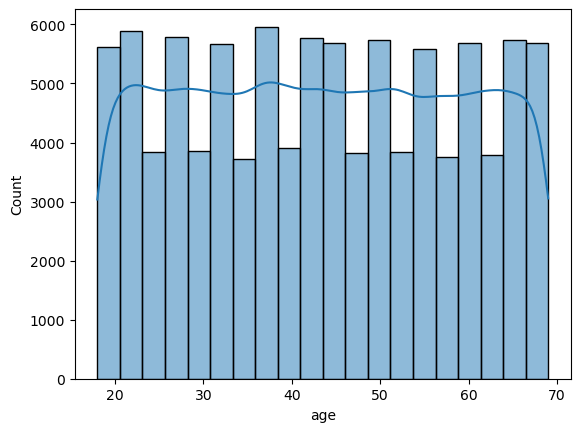

In [142]:
#plt.figure(figsize=(8, 6))
sns.histplot(customer['age'], kde=True, bins=20)# Imputing missing values in the 'age' column with the mean
customer['age'].fillna(customer['age'].mean(), inplace=True)

In [143]:
# Imputing missing values in the 'age' column with the mean
customer['age'].fillna(customer['age'].mean(), inplace=True)

In [144]:
customer.isnull().sum()

customer_id       0
gender            0
age               0
payment_method    0
dtype: int64

In [145]:
#checking for duplicates
customer_duplicates = customer.duplicated().sum()
customer_duplicates

0

In [146]:
sales_duplicates = sales.duplicated().sum()
sales_duplicates

2

In [147]:
# Remove duplicates
sales.drop_duplicates(inplace=True)
sales.duplicated().sum()


0

In [148]:
#Checking unique value counts to ensure no spelling errors in the variable names
sales['category'].value_counts()

category
Clothing           34485
Cosmetics          15097
Food & Beverage    14776
Toys               10087
Shoes              10034
Souvenir            4999
Technology          4996
Books               4981
Clothin                2
Name: count, dtype: int64

In [149]:
category_mapping = {'Clothin': 'Clothing'}

# Applying the mapping to correct the category names
sales['category'] = sales['category'].replace(category_mapping)


In [150]:
sales['category'].value_counts()

category
Clothing           34487
Cosmetics          15097
Food & Beverage    14776
Toys               10087
Shoes              10034
Souvenir            4999
Technology          4996
Books               4981
Name: count, dtype: int64

In [151]:
sales['shopping_mall'].value_counts()

shopping_mall
Mall of Istanbul     19943
Kanyon               19823
Metrocity            15011
Metropol AVM         10161
Istinye Park          9781
Zorlu Center          5075
Cevahir AVM           4991
Forum Istanbul        4947
Viaport Outlet        4914
Emaar Square Mall     4811
Name: count, dtype: int64

In [152]:
#Creating 'total_value' as quantity * price
sales['total_value'] = sales['quantity'] * sales['price']

In [153]:
#New age group column
bins = [0, 18, 30, 45, 60, 100]
labels = ['<18', '18-30', '31-45', '46-60', '60+']

# Create a new column 'age_group' based on the bins
customer['age_bracket'] = pd.cut(customer['age'], bins=bins, labels=labels, right=False)

In [154]:
#viewing cleanded data sets
customer.head()

,customer_id,gender,age,payment_method,age_bracket
0,C241288,Female,28.0,Credit Card,18-30
1,C111565,Male,21.0,Debit Card,18-30
2,C266599,Male,20.0,Cash,18-30
3,C988172,Female,66.0,Credit Card,60+
4,C189076,Female,53.0,Cash,46-60


In [155]:
customer.shape


(99457, 5)

In [156]:
sales.head()

,invoice_no,customer_id,category,quantity,price,invoice_date,shopping_mall,total_value
98687,I100008,C199951,Clothing,5,1500.40,2022-07-10,Emaar Square Mall,7502.00
19497,I100014,C138893,Cosmetics,5,203.30,2021-06-18,Viaport Outlet,1016.50
6950,I100015,C132779,Clothing,2,600.16,2021-03-04,Mall of Istanbul,1200.32
94698,I100024,C244411,Books,3,45.45,2023-01-05,Emaar Square Mall,136.35
36979,I100027,C150002,Technology,4,4200.00,2022-05-18,Mall of Istanbul,16800.00


In [157]:
sales.shape


(99457, 8)

In [158]:
#saving cleaned copies of datasets
sales.to_csv('cleaned_sales_data1.csv', index=False)
customer.to_csv('cleaned_customer_data1.csv', index=False)


In [159]:
#integrate data from different datasets into a unified datase
# Merge the datasets on 'customer_id'
customer_sales_df = pd.merge(sales, customer, on='customer_id', how='inner')

In [160]:
#Viewing integrated data for validation
customer_sales_df.head()

,invoice_no,customer_id,category,quantity,price,invoice_date,shopping_mall,total_value,gender,age,payment_method,age_bracket
0,I100008,C199951,Clothing,5,1500.40,2022-07-10,Emaar Square Mall,7502.00,Male,65.0,Cash,60+
1,I100014,C138893,Cosmetics,5,203.30,2021-06-18,Viaport Outlet,1016.50,Male,55.0,Cash,46-60
2,I100015,C132779,Clothing,2,600.16,2021-03-04,Mall of Istanbul,1200.32,Female,35.0,Debit Card,31-45
3,I100024,C244411,Books,3,45.45,2023-01-05,Emaar Square Mall,136.35,Female,67.0,Credit Card,60+
4,I100027,C150002,Technology,4,4200.00,2022-05-18,Mall of Istanbul,16800.00,Female,19.0,Cash,18-30


In [161]:
customer_sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   invoice_no      99457 non-null  object        
 1   customer_id     99457 non-null  object        
 2   category        99457 non-null  object        
 3   quantity        99457 non-null  int64         
 4   price           99457 non-null  float64       
 5   invoice_date    99457 non-null  datetime64[ns]
 6   shopping_mall   99457 non-null  object        
 7   total_value     99457 non-null  float64       
 8   gender          99457 non-null  object        
 9   age             99457 non-null  float64       
 10  payment_method  99457 non-null  object        
 11  age_bracket     99457 non-null  category      
dtypes: category(1), datetime64[ns](1), float64(3), int64(1), object(6)
memory usage: 8.4+ MB


In [162]:
customer_sales_df.isnull().sum()

invoice_no        0
customer_id       0
category          0
quantity          0
price             0
invoice_date      0
shopping_mall     0
total_value       0
gender            0
age               0
payment_method    0
age_bracket       0
dtype: int64

In [ ]:
#saving integrated dataset
def save_integrated_dataset(df, filename):
    try:
        df.to_csv(filename, index=False)
        print("File uploaded successfully.")
    except Exception as e:
        print("Failed to upload the file. Error: {e}")
        
save_integrated_dataset(customer_sales_df, 'Cleaned_customer_salesV.1.0.csv')

In [168]:
#saving integrated dataset
def save_integrated_dataset(df, filename):
    try:
        df.to_csv(filename, index=False)
        print("File uploaded successfully.")
    except Exception as e:
        print("Failed to upload the file. Error: {e}")
        
save_integrated_dataset(customer_sales_df, 'Assignment2/Cleaned_customer_salesV.1.0.csv')

File uploaded successfully.


In [ ]:
Assignment2/Cleaned_customer_salesV.1.0.csv

In [ ]:
# Convert the 'invoice_date' column to datetime format
sales['invoice_date'] = pd.to_datetime(sales['invoice_date'], format='%d-%m-%Y')
